In [145]:
import numpy as np
import scipy.special
import matplotlib.pyplot

# 시각화가 외부 윈도우가 아닌 현재의 노트북 내에서 보이도록 설정.
%matplotlib inline

# 신경망 클래스의 정의
class NeuralNetwork:
    
    # 신경망 초기화하기
    def __init__(self, _inputNodes, _hiddenNodes, _outputNodes, _learningRate):
        '''
            하나의 클래스에 신경망의 크기를 전달함으로써 신경망 생성이 가능하며,
            마찬가지로 학습률(learning rate)도 전달이 가능하다.
        '''
        
        self.i_nodes = _inputNodes
        self.h_nodes = _hiddenNodes
        self.o_nodes = _outputNodes
        
        # --------------------------------------------------------------------------------
        
        # 신경망에서 가장 중요한 부분이 바로 연결 노드의 가중치이다.
        # 가중치는 전파시 전달되는 신호와 역전파 시 오차를 계산하는 데 쓰이며, 
        # 이를 통해 신경망을 개선하는 역할을 수행한다.

        # 가중치는 행렬로 간결하게 표현될 수 있다.
        # 각각의 가중치는 임의의 작은 값으로 초기화 한다.

        # 1. (은닉 노드 x 입력 노드)의 크기를 갖는 입력 계층과 은닉 계층 사이의 가중치의 행렬
        # W(input_hidden)
        
        # 2. (출력노드 x 은닉 노드)의 크기를 갖는 은닉 계층과 출력 계층 사이의 가중치의 행렬
        # W(hidden_output)

        # numpy를 이용해서 0과 1 사이의 임의로 선택한 값을 원소로 가지는 행렬을 생성.
        # 이 행렬의 크기는 (행 x 열)

        # input -> hidden
        # self.wih = (np.random.rand(self.h_nodes, self.i_nodes) - 0.5)

        # hidden -> output
        # self.who = (np.random.rand(self.o_nodes, self.h_nodes) - 0.5)
        
        # --------------------------------------------------------------------------------
        
        # 가중치를 임의의 값으로 초기화하는 더 정교한 방법이 있음.
        # 이 경우, 가중치는 0을 중심으로 하여 1/sqrt(들어오는 연결 노드의 개수)의 표준 편차를 갖는
        # 정규분포에 따라 구하도록 한다.
        # numpy의 numpy.random.normal() 함수를 활용하면 이를 쉽게 구현할 수 있다.
        # 이 변수에 필요한 매개변수는 정규분포의 중심, 표준편차, numpy 행렬이다.
        
        # input -> hidden
        # Python에서 노드로 들어오는 연결 노드의 개수에 루트를 씌우고 역수를 취한 표준편차는 파이썬의 문법으로 아래와 같이 표현됨.
        # 1. 정규분포의 중심은 0.0
        # 2. 표준편차
        # 3. 우리가 원하는 numpy 행렬
        self.wih = np.random.normal(0.0, pow(self.i_nodes, -0.5), (self.h_nodes, self.i_nodes))
        self.who = np.random.normal(0.0, pow(self.h_nodes, -0.5), (self.o_nodes, self.h_nodes))
        
        # --------------------------------------------------------------------------------
        
        # 학습률(learning rate)
        self.lr = _learningRate
        
        # --------------------------------------------------------------------------------

        # 활성화 함수
        # 활성화 함수에 약간의 변화를 주거나, 아니면 때로는 다른 활성화 함수로 교체하는 경우가 있을 수 있으므로,
        # 활성화 함수를 신경망 객체의 초기화 부분에 정의해 두는 것이 좋다.
        
        # lambda 함수로 전달받은 인자 x에 대하여 scipy.special.expit(시그모이드 함수)에 x를 넣은 값을 return한다.
        # 일종의 anonymous function이며, activation_function에 할당된 것이다.
        self.activation_function = lambda x: scipy.special.expit(x) 
        
        # --------------------------------------------------------------------------------
        
        pass
        
    # 신경망 학습시키기
    def train(self, _inputs_list, _targets_list):
        '''
            train 함수에는 targets_list라는 매개변수가 있는데,
            이 매개변수가 없이는 신경망을 제대로 학습시킬 수 없다.
        '''

        # 학습에는 두 가지 단계가 있다. 
        # 1) 첫 번째 단계는 query() 함수와 마찬가지로 출력 값을 계산해내는 단계이다.
        # 2) 두 번째 단계는 가중치가 어떻게 업데이트되어야 하는지 알려주기 위해 오차를 역전파 하는 단계이다.
        
        # 입력 리스트를 2차원의 행렬로 변환
        inputs = np.array(_inputs_list, ndmin=2).T # ndmin은 matrix의 차원을 의미함.
        targets = np.array(_targets_list, ndmin=2).T # T는 transpose
        
        # 은닉 계층으로 들어오는 신호를 계산
        hidden_inputs = np.dot(self.wih, inputs) # self.wih : input -> hidden의 weight(가중치)
        
        # 은닉 계층에서 나가는 신호를 계산
        # activiation function인 sigmoid를 거쳐서 값을 0~1 사이의 값으로 변환
        hidden_outputs = self.activation_function(hidden_inputs) 
        
        # 최종 출력 계층으로 들어오는 신호를 계산
        final_inputs = np.dot(self.who, hidden_outputs)
        
        # 최종 출력 계층에서 나가는 신호를 계산
        final_outputs = self.activation_function(final_inputs)
        
        # --------------------------------------------------------------------------------
        # 학습 데이터에 의해 제공되는 실제 값과 우리가 계산한 결과 값 간의 차이를 통해 오차를 계산한다.
        # 즉, 오차는 (실제 값 행렬 - 계산 값 행렬)이다.
        
        # 은닉 계층과 최종 계층 간의 가중치는 output_errors
        output_errors = targets - final_outputs
        
        # 은닉 계층의 오차는 가중치에 의해 나뉜 출력 계층의 오차들을 재조합해 계산
        hidden_errors = np.dot(self.who.T, output_errors)
        
        # 은닉 계층과 출력 계층 간의 가중치 업데이트
        self.who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs))
        # self.lr : 학습률. 식의 나머지 부분 전체에 곱해진다.
        # final_outputs * (1.0 - final_outputs) : 오차의 다음 계층으로부터의 시그모이드
        # np.transpose(hidden_outputs) : 이전 계층으로부터의 결과값을 전치한 것.
        
        # 입력 계층과 은닉 계층 간의 가중치 업데이트
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))
    
        pass
    
    # 신경망에 질의하기
    def query(self, _inputs_list):
        '''
            신경망으로 들어오는 입력을 받아 출력을 반환한다.
            입력 계층부터 은닉 계층을 거쳐 최종 출력 계층까지 수행한다.
            또한, 신호는 은닉 노드와 출력 노드로 전달될 때 가중치 연산과 활성화 함수 적용을 거친다.
        '''
        
        # --------------------------------------------------------------------------------
        
        # 입력 리스트를 2차원 행렬로 변환
        
        # 우선 1차원 array로 데이터를 넘기면, np.array를 통해서
        # 2차원 matrix로 변환하는 것으로 생각하면 될듯.
        inputs = np.array(_inputs_list, ndmin=2).T # 뒤에 붙은 T는 transpose?
        
        # --------------------------------------------------------------------------------

        # 은닉 계층으로 들어오는 신호를 계산
        
        # numpy의 dot 함수를 통해서 은닉 계층의 각 노드로 들어오는 신호를 계산한다.
        # 내적을 이용하면 입력 계층이나 은닉 계층의 노드 수가 달라지더라도 코드를 다시 작성할 필요가 없다.
        hidden_inputs = np.dot(self.wih, inputs)
        
        # --------------------------------------------------------------------------------

        # 은닉 계층에서 나가는 신호를 계산
        
        # 이제 은닉계층으로부터 나오는 신호를 구하려면, 시그모이드 함수를 적용하는 일만 하면 된다.
        hidden_outputs = self.activation_function(hidden_inputs)
        # activation_function을 거치면, 은닉 계층에서 나가는 신호들은 hidden_outputs에 저장된다.
        
        # --------------------------------------------------------------------------------

        # 최종 출력 계층으로 들어오는 신호를 계산
        
        final_inputs = np.dot(self.who, hidden_outputs)
        
        # --------------------------------------------------------------------------------

        # 최종 출력 계층에서 나가는 신호를 계산
        
        final_outputs = self.activation_function(final_inputs)

        # --------------------------------------------------------------------------------

        return final_outputs

        # 이후에 노드의 개수(hidden_layer)가 많아지면 for loop을 돌려서 학습시키는 것인듯?
        

In [146]:
# 입력, 은닉, 출력 노드의 수
input_nodes = 784
hidden_nodes = 500
output_nodes = 10

# 학습률은 0.3으로 정의
learning_rate = 0.2

# 신경망의 인스턴스를 생성
n = NeuralNetwork(_inputNodes=input_nodes, _hiddenNodes=hidden_nodes, _outputNodes=output_nodes, _learningRate=learning_rate)

# len(n.data_list)

# 학습 데이터 파일 읽기
training_data_file = open("./mnist_train.csv", 'r')

# 현재 파일의 크기가 그렇게 크지 않으므로, readlines()로 한 번에 데이터를 메모리로 올린다.
# 하지만 학습 데이터의 크기가 클 경우, readline()을 이용하여 한 행씩 데이터를 올리는 것이 좋다.
training_data_list = training_data_file.readlines()
training_data_file.close()


In [147]:
# all_values = n.data_list[0].split(',') # 레이블 분리

'''
    np.asfarray를 이용해 문자열을 실수로 변환.
    이때, all_values[1:]을 이용해서 첫 번째 원소를 제외한 나머지 값만을 취한다.
    이렇게 얻은 값을 28x28의 matrix로 변환한다.
'''

# image_array = np.asfarray(all_values[1:]).reshape((28, 28))
# matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

'\n    np.asfarray를 이용해 문자열을 실수로 변환.\n    이때, all_values[1:]을 이용해서 첫 번째 원소를 제외한 나머지 값만을 취한다.\n    이렇게 얻은 값을 28x28의 matrix로 변환한다.\n'

In [148]:
'''
데이터를 학습시킬 때, 입력 데이터와 출력 데이터의 값들이 적절한 형태를 가져
활성화 함수의 수용 범위 내에 있게 되면 신경망은 더 잘 동작하게 된다.
이에 따라, 색상 값이 0.01 ~ 1.0 사이의 값을 갖도록 만든다.
이때 입력 값이 0이 되면 가중치가 사라지게 되므로, 입력의 하한선은 0.01, 상한선은 1.0으로 설정한다.
'''

# scaled_input = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01

# scaled_input = scaled_input.reshape((28, 28))
# print(scaled_input)
# matplotlib.pyplot.imshow(scaled_input, cmap='Greys', interpolation='None')

'\n데이터를 학습시킬 때, 입력 데이터와 출력 데이터의 값들이 적절한 형태를 가져\n활성화 함수의 수용 범위 내에 있게 되면 신경망은 더 잘 동작하게 된다.\n이에 따라, 색상 값이 0.01 ~ 1.0 사이의 값을 갖도록 만든다.\n이때 입력 값이 0이 되면 가중치가 사라지게 되므로, 입력의 하한선은 0.01, 상한선은 1.0으로 설정한다.\n'

- - -
우리가 Activation Function으로 사용하는 로지스틱 함수는 값의 범위가 0.0 ~ 1.0이다.   
이때 0.0과 1.0에는 무한히 접근만 할 뿐, 실제 0.0이나 1.0이 될 수는 없다.   
그러므로 학습 시에 우리의 결과 값의 범위를 조정해주어야 한다.   
   
우리가 신경망의 학습 과정에 바라는 것은 최종적으로 0~9 사이의 숫자를 분류해 내는 것이다.   
그러므로, 우리는 0~9를 분류해 낼 10개의 노드가 필요하다. 각 노드는 가능한 결과 값. 즉, 각 레이블에 해당할 것이다.   
(활성화 함수는 0.0과 1.0에 점근하기 때문에, 절대로 각 노드들이 0.0이라는 값을 가질 수는 없고, 무한히 가까운 값을 가짐)   
   
- - - 
   
만약 학습 데이터의 레이블이 5라면, 우리는 결과 값 행렬을 만들 때   
5에 상응하는 노드 외에는 작은 값을 갖도록 행렬을 구성할 필요가 있다.   
> ex : [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]   
   
그런데, 앞에서 활성화 함수가 도달할 수 없는 0과 1이라는 값을 사용하게 되면 큰 값의 가중치를 통해 신경망이 포화된다.   
그러므로, 값의 범위를 0.01 ~ 0.99 등과 같이 적용하는 것이 좋다.   
> ex : [0.01, 0.01, 0.01, 0.01, 0.01, 0.99, 0.01, 0.01, 0.01, 0.01]   
- - -


# 신경망 학습시키기

In [149]:
'''
    onodes = 10 # 10개의 노드를 가지기 때문에 output node를 10 개 생성
    targets = np.zeros(onodes) + 0.01 # 최소 값을 유지하기 위해 값이 모두 0인 1x10의 리스트를 만들고, 최소값 설정 
    targets[int(all_values[0])] = 0.99 # 레이블을 떼와서, 해당 레이블에 매칭되는 노드의 값을 0.99로 만들어 준다.
'''

# 반복 횟수(epoch) 설정
epochs = 2

for e in range(epochs):
    # 학습 데이터에서 한 row를 record라고 함.
    for record in training_data_list:
        # 레코드를 쉼표에 의해 분리
        all_values = record.split(',')
        
        # 입력 값의 범위와 값 조정
        inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        
        # 결과 값 생성 (실제 값인 0.99 외에는 모두 0.01)
        targets = np.zeros(output_nodes) + 0.01
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass


### 은닉 노드의 개수 선택   
* 현재까지 은닉 노드를 몇 개로 해야 할지 결정하는 데 대한 완벽한 방법론은 존재하지 않는다.   
   
    그러므로 현재로서 최선의 접근 방법은 우리가 해결해야 하는 문제에서 최적의 설정을 찾을 때까지   
    실험을 반복하며 그것을 찾아내는 것이다.   


# 학습 결과 확인

In [150]:
test_data_file = open('./mnist_test.csv', 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [151]:
# get the first test record
all_values = test_data_list[0].split(',')

# print the label
print(all_values[0])

7


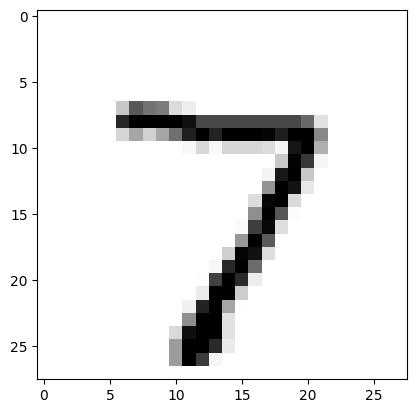

In [152]:
image_array = np.asfarray(all_values[1:]).reshape((28, 28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

In [153]:
n.query((np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01)

array([[0.00686683],
       [0.01301052],
       [0.01791198],
       [0.00221884],
       [0.00292211],
       [0.00210138],
       [0.00420705],
       [0.98539431],
       [0.006177  ],
       [0.00116417]])

In [154]:
# 신경망 테스트

# 신경망의 성능의 지표가 되는 성적표를 아무 값도 가지지 않도록 초기화
scorecard = []

# 테스트 데이터 모음 내의 모든 레코드 탐색
for record in test_data_list:
    # 레코드를 쉼표에 의해 분리
    all_values = record.split(',')
    
    # 정답은 첫 번째 값
    correct_label = int(all_values[0])
        
    # 입력 값의 범위와 값 조정
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    
    # 신경망에 질의
    outputs = n.query(inputs)
    
    # 가장 높은 값의 인덱스는 레이블의 인덱스와 일치
    label = np.argmax(outputs)
    
    # print(correct_label, "correct label")
    # print(label, "network's answer")
    
    # 정답 또는 오답을 리스트에 추가
    if (label == correct_label):
        # 정답인 경우 성적표에 1을 더함
        scorecard.append(1)
    else:
        # 정답이 아닌 경우 성적표에 0을 더함
        scorecard.append(0)
        
    pass

# np.array VS np.asarray
# 두 방식은 구조적으로는 모두 동일하나, array는 copy=True인 반면, asarray는 copy=False이다.
# 즉, array를 다른 변수에 할당하고 원본을 변경하면 array의 copy 본은 변겨외지 않지만, (deep copy)
# asarray의 경우 원본이 변경될 경우 asarray의 복사본까지 변경된다. (shallow copy)

scorecard_array = np.asarray(scorecard) # 내부의 값들을 
print("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.9537
